In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm, poisson, gamma

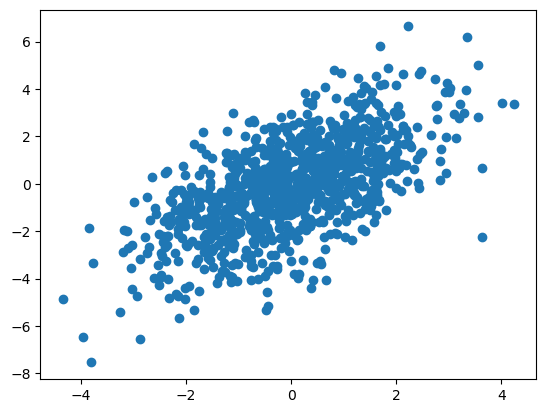

In [11]:
dist = multivariate_normal(np.array([0,0]), np.array([[2, 1.85], [1.85, 4]]))
samp = dist.rvs(1000)
plt.scatter(samp[:,0], samp[:,1])

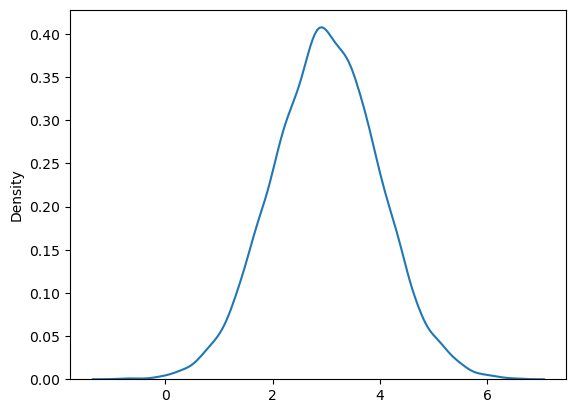

In [26]:
# define normal mu=3, sigma = 1 distribution
norm_dist = norm(3, 1)

# sample 1000 draws from it
N = 10000
norm_sample = norm_dist.rvs(N)
sns.kdeplot(norm_sample);

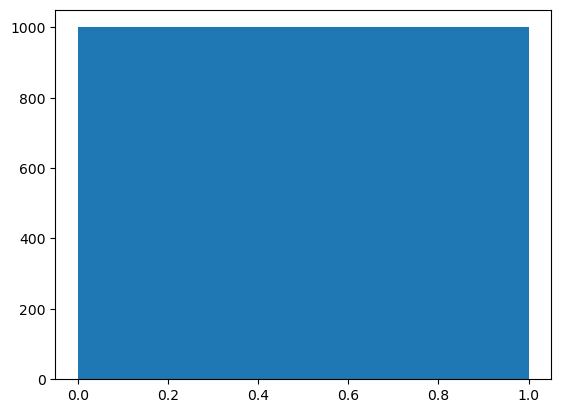

In [27]:
# compute the cdf of the sample
cdf = np.array([np.sum(norm_sample <= s)/N for s in norm_sample])

plt.hist(cdf);

Mean: 5.044
Var: 4.970064


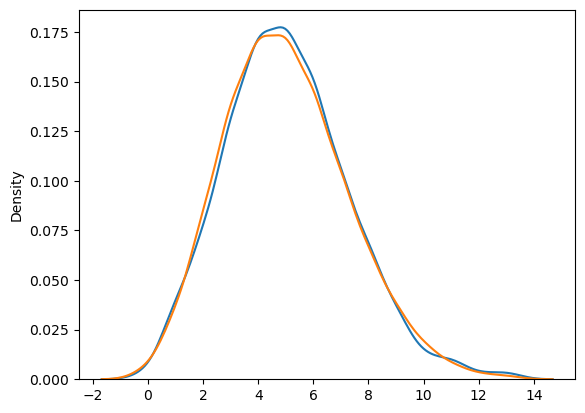

In [53]:
# we can use this uniform distribution to sample from a poission
pois_dist = poisson(5)

# sample from it
pois_sample = pois_dist.rvs(N)

# map the sampled cdfs to the poission dist
pois_sample_converted = pois_dist.ppf(cdf[cdf < 1])

# now plot
sns.kdeplot(pois_sample, label = "From Dist")
sns.kdeplot(pois_sample_converted, label = "Converted");
print(f"Mean: {np.mean(pois_sample)}")
print(f"Var: {np.std(pois_sample)**2}")